### Caricamento dataset ###

In [334]:
import pandas as pd
#import world covid cases
df_covid_cases = pd.read_csv('../datasets/COVID-19-geographic-disbtribution-worldwide-2020-08-01.csv',delimiter=';', keep_default_na=False, na_values=[''])
#import environmental air quality data
df_air_data = pd.read_csv('../datasets/waqi-covid19-airqualitydata-2020.csv',delimiter=',', keep_default_na=False, na_values=[''])
df_air_data

,Date,Country,City,Specie,count,min,max,median,variance
0,2020-01-06,BE,Liège,wind gust,144,1.0,9.7,3.5,51.75
1,2020-01-09,BE,Liège,wind gust,144,3.0,13.5,9.5,81.61
2,2020-01-30,BE,Liège,wind gust,144,5.4,15.8,10.0,77.89
3,2020-01-04,BE,Liège,wind gust,144,0.2,11.1,6.5,79.45
4,2020-01-31,BE,Liège,wind gust,144,6.8,16.8,11.5,70.07
...,...,...,...,...,...,...,...,...,...
1268612,2020-01-25,SG,Singapore,wind gust,36,0.2,2.7,0.2,6.12
1268613,2020-02-25,SG,Singapore,wind gust,29,5.7,13.0,9.0,41.38
1268614,2020-01-09,SG,Singapore,wind gust,15,0.3,7.0,1.0,66.34
1268615,2020-01-20,SG,Singapore,wind gust,12,0.2,0.7,0.2,0.51


In [335]:
#identify temporal intervals
#convert to datetime
df_covid_cases.dateRep=pd.to_datetime(df_covid_cases['dateRep'], format='%d/%m/%Y')
df_air_data.Date=pd.to_datetime(df_air_data['Date'], format='%Y-%m-%d')
#identify temporal intervals
print("min time air quality data:",df_air_data.Date.min())
print("max time air quality data:",df_air_data.Date.max())

print("min time covid cases:",df_covid_cases.dateRep.min())
print("max time covid cases:",df_covid_cases.dateRep.max())

min time air quality data: 2019-12-30 00:00:00
max time air quality data: 2020-08-02 00:00:00
min time covid cases: 2019-12-31 00:00:00
max time covid cases: 2020-08-01 00:00:00


In [336]:
#controllo campi null
df_covid_cases.isna().sum()

dateRep                                                          0
day                                                              0
month                                                            0
year                                                             0
cases                                                            0
deaths                                                           0
countriesAndTerritories                                          0
geoId                                                            0
countryterritoryCode                                            64
popData2019                                                     64
continentExp                                                     0
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    2781
dtype: int64

In [337]:
#64 record con countryterritoryCode null                                          
df_covid_cases.loc[df_covid_cases.countryterritoryCode.isna()]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
5940,2020-03-10,10,3,2020,-9,1,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
5941,2020-03-02,2,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
5942,2020-03-01,1,3,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
5943,2020-02-29,29,2,2020,0,2,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
5944,2020-02-28,28,2,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
5999,2020-01-04,4,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6000,2020-01-03,3,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6001,2020-01-02,2,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN
6002,2020-01-01,1,1,2020,0,0,Cases_on_an_international_conveyance_Japan,JPG11668,NaN,NaN,Other,NaN


In [338]:
#trattasi dei casi sulla nave da crociera in Giappone
#rimozione
df_covid_cases = df_covid_cases.loc[~df_covid_cases.countryterritoryCode.isna()]

In [339]:
#casi normalizzati per popolazione
#df_covid_cases['Cases_x_pop'] = df_covid_cases['cases']/df_covid_cases_grp['popData2019']
#df_covid_cases.to_csv("../datasets/covid_cases_x_pop.csv")

In [341]:
#aggiunta giorni e mesi assoluti
day_number = ((df_covid_cases['dateRep'] - df_covid_cases.dateRep.min()).dt.days)+1
df_covid_cases['day_number'] = day_number
df_covid_cases = df_covid_cases.sort_values(by='day_number', ascending=True)
df_covid_cases['week_number'] = ((df_covid_cases['day_number']-1)/7)+1
df_covid_cases['week_number']=df_covid_cases.week_number.astype(int)


In [342]:
df_covid_cases

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,day_number,week_number
4560,2019-12-31,31,12,2019,0,0,Brazil,BR,BRA,211049519.0,America,NaN,1,1
22791,2019-12-31,31,12,2019,0,0,Nigeria,NG,NGA,200963603.0,Africa,NaN,1,1
11889,2019-12-31,31,12,2019,0,0,Georgia,GE,GEO,3996762.0,Europe,NaN,1,1
25320,2019-12-31,31,12,2019,0,0,Qatar,QA,QAT,2832071.0,Asia,NaN,1,1
17351,2019-12-31,31,12,2019,0,0,Kuwait,KW,KWT,4207077.0,Asia,NaN,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24471,2020-08-01,1,8,2020,3980,40,Philippines,PH,PHL,108116622.0,Asia,28.074314,215,31
5243,2020-08-01,1,8,2020,5,0,Cambodia,KH,KHM,16486542.0,Asia,0.412458,215,31
16999,2020-08-01,1,8,2020,0,0,Kosovo,XK,XKX,1798506.0,Europe,146.343687,215,31
26289,2020-08-01,1,8,2020,0,0,San_Marino,SM,SMR,34453.0,Europe,5.805010,215,31


In [343]:
#controllo campi null air data
df_air_data.isna().sum()

Date        0
Country     0
City        0
Specie      0
count       0
min         0
max         0
median      0
variance    0
dtype: int64

In [375]:
#aggrego sulle province e regioni
df_covid_cases_grp = df_covid_cases.groupby(['countryterritoryCode','week_number']).agg(Date=('dateRep','max'),Cases=('cases', 'sum'),countryName=('countriesAndTerritories','first'), popData2019=('popData2019','max'))
df_covid_cases_grp['TotalCases'] = df_covid_cases_grp.groupby(level=-2)['Cases'].cumsum()
df_covid_cases_grp.reset_index(inplace=True)
df_covid_cases_grp = df_covid_cases_grp.sort_values(by='Date', ascending=True)
df_covid_cases_grp

,countryterritoryCode,week_number,Date,Cases,countryName,popData2019,TotalCases
1276,DNK,1,2020-01-06,0,Denmark,5806081.0,0
2329,ISR,1,2020-01-06,0,Israel,8519373.0,0
4821,VNM,1,2020-01-06,0,Vietnam,96462108.0,0
1618,FRA,1,2020-01-06,0,France,67012883.0,0
188,ARM,1,2020-01-06,0,Armenia,2957728.0,0
...,...,...,...,...,...,...,...
3840,PSE,31,2020-08-01,2103,Palestine,4981422.0,15232
1617,FLK,31,2020-08-01,0,Falkland_Islands_(Malvinas),3372.0,13
3818,PRY,31,2020-08-01,894,Paraguay,7044639.0,5338
331,AZE,31,2020-08-01,1828,Azerbaijan,10047719.0,31878


In [384]:
#legge i geo json con geopandas
import geopandas
import os
import fnmatch
created=False
for file_name in os.listdir('../datasets/'):
    if fnmatch.fnmatch(file_name, '*.geojson'):
        if(~created):
            country=geopandas.read_file('../datasets/'+file_name)
            countries=country
            created=True
        else:
            countries.append(geopandas.read_file('../data_covid/'+file_name))

In [385]:
#paesi che non sono presenti nel dataset covid cases
countries.loc[~countries['ISO3_CODE'].isin(df_covid_cases_grp['countryterritoryCode']) ]

,id,CNTR_NAME,ISO3_CODE,CNTR_ID,NAME_ENGL,FID,geometry
9,AS,American Samoa-Sāmoa Amelika,ASM,AS,American Samoa,AS,"MULTIPOLYGON (((-170.67082 -14.23838, -170.589..."
15,CK,Cook Islands-Kūki 'Āirani,COK,CK,Cook Islands,CK,"MULTIPOLYGON (((-159.72146 -21.24608, -159.754..."
16,AQ,Antarctica,ATA,AQ,Antarctica,AQ,"MULTIPOLYGON (((-57.34206 -63.23948, -57.09707..."
20,BL,Saint-Barthélemy,BLM,BL,Saint Barthélemy,BL,"POLYGON ((-62.85933 17.89355, -62.79877 17.928..."
26,BV,Bouvetøya,BVT,BV,Bouvet Island,BV,"POLYGON ((3.29560 -54.41711, 3.30409 -54.39881..."
41,CC,Cocos Keeling Islands,CCK,CC,Cocos (Keeling) Islands,CC,"MULTIPOLYGON (((96.84800 -11.81060, 96.83228 -..."
54,CP,Île Clipperton,CPT,CP,Clipperton Island,CP,"POLYGON ((-109.25142 10.31413, -109.23663 10.3..."
59,CX,Christmas Island,CXR,CX,Christmas Island,CX,"POLYGON ((105.55213 -10.49521, 105.55928 -10.4..."
66,FM,Micronesia,FSM,FM,Micronesia,FM,"MULTIPOLYGON (((158.21659 6.98726, 158.31908 6..."
83,HK,香港,HKG,HK,Hong Kong,HK,"MULTIPOLYGON (((114.03762 22.50370, 114.16130 ..."


In [387]:
#paesi che non sono preenti nel dataset geo layer
df_covid_cases_grp.loc[~df_covid_cases_grp['countryterritoryCode'].isin(countries['ISO3_CODE'])]

,countryterritoryCode,week_number,Date,Cases,countryName,popData2019,TotalCases,Year-Week
940,CNG1925,1,2020-01-06,0,Taiwan,23773881.0,0,2020-01
941,CNG1925,2,2020-01-13,0,Taiwan,23773881.0,0,2020-02
942,CNG1925,3,2020-01-20,0,Taiwan,23773881.0,0,2020-03
943,CNG1925,4,2020-01-27,5,Taiwan,23773881.0,5,2020-04
944,CNG1925,5,2020-02-03,5,Taiwan,23773881.0,10,2020-05
945,CNG1925,6,2020-02-10,8,Taiwan,23773881.0,18,2020-06
946,CNG1925,7,2020-02-17,2,Taiwan,23773881.0,20,2020-07
947,CNG1925,8,2020-02-24,8,Taiwan,23773881.0,28,2020-08
948,CNG1925,9,2020-03-02,12,Taiwan,23773881.0,40,2020-09
949,CNG1925,10,2020-03-09,5,Taiwan,23773881.0,45,2020-10


In [388]:
#ricerca Taiwan, Kosovo, Montserrat
countries.loc[(countries['CNTR_NAME'].str.contains('Taiwan'))|(countries['CNTR_NAME'].str.contains('Kosovo'))|(countries['CNTR_NAME'].str.contains('Montserrat'))]

,id,CNTR_NAME,ISO3_CODE,CNTR_ID,NAME_ENGL,FID,geometry
113,MS,Montserrat,MSR,MS,Montserrat,MS,"POLYGON ((-62.24175 16.72228, -62.20328 16.826..."


In [389]:
#fix errore Montserrat MSF->MSR
df_covid_cases_grp.loc[(df_covid_cases_grp['countryterritoryCode']=='MSF'),['countryterritoryCode']]='MSR'



In [390]:
#anno e settimana
df_covid_cases_grp['Year-Week'] = df_covid_cases_grp['Date'].dt.strftime('%Y-%U')

In [391]:
df_covid_cases_grp

,countryterritoryCode,week_number,Date,Cases,countryName,popData2019,TotalCases,Year-Week
1276,DNK,1,2020-01-06,0,Denmark,5806081.0,0,2020-01
2329,ISR,1,2020-01-06,0,Israel,8519373.0,0,2020-01
4821,VNM,1,2020-01-06,0,Vietnam,96462108.0,0,2020-01
1618,FRA,1,2020-01-06,0,France,67012883.0,0,2020-01
188,ARM,1,2020-01-06,0,Armenia,2957728.0,0,2020-01
...,...,...,...,...,...,...,...,...
3840,PSE,31,2020-08-01,2103,Palestine,4981422.0,15232,2020-30
1617,FLK,31,2020-08-01,0,Falkland_Islands_(Malvinas),3372.0,13,2020-30
3818,PRY,31,2020-08-01,894,Paraguay,7044639.0,5338,2020-30
331,AZE,31,2020-08-01,1828,Azerbaijan,10047719.0,31878,2020-30


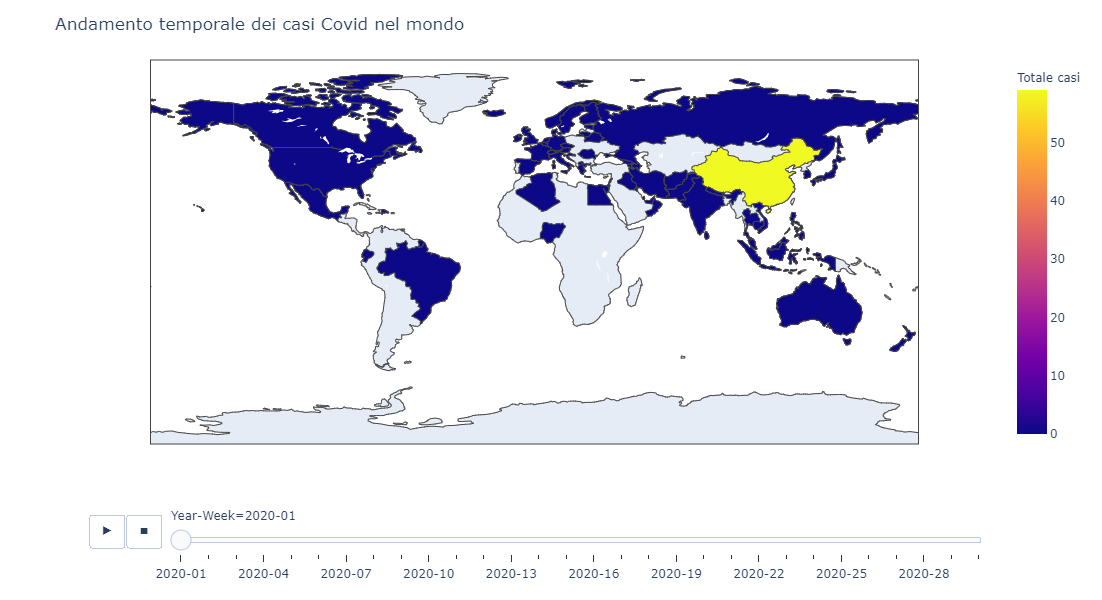

In [404]:
import plotly.express as px

fig_total_cases = px.choropleth(df_covid_cases_grp, locations="countryterritoryCode",
                    color="TotalCases", # lifeExp is a column of gapminder
                    hover_name="countryName", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                   animation_frame='Year-Week',
                   labels={'TotalCases':'Totale casi'})
#disegno
#fig_total_cases.update_layout(title_text = 'Andamento temporale dei casi Covid nel mondo',height=600,width=900,margin={"r":0,"t":0,"l":0,"b":0})
fig_total_cases.update_layout(title_text = 'Andamento temporale dei casi Covid nel mondo',height=600,width=900)
fig_total_cases.show()

In [405]:
import chart_studio.plotly as py
py.iplot(fig_total_cases, sharing='public')

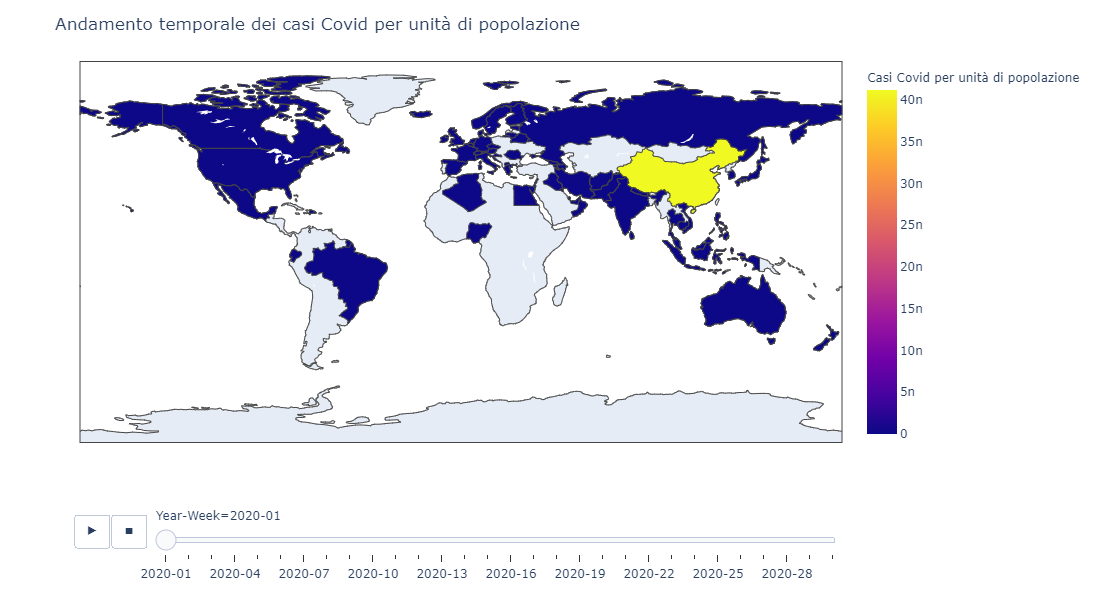

In [406]:
df_covid_cases_grp['TotalCases_x_pop'] = df_covid_cases_grp['TotalCases']/df_covid_cases_grp['popData2019']

fig_total_cases_pop = px.choropleth(df_covid_cases_grp, locations="countryterritoryCode",
                    color="TotalCases_x_pop", # lifeExp is a column of gapminder
                    hover_name="countryName", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma,
                     animation_frame='Year-Week',
                   labels={'TotalCases_x_pop':'Casi Covid per unità di popolazione'})
#disegno
fig_total_cases_pop.update_layout(title_text = 'Andamento temporale dei casi Covid per unità di popolazione',height=600,width=900)
fig_total_cases_pop.show()

In [407]:
import chart_studio.plotly as py
py.iplot(fig_total_cases_pop, sharing='public')